# Online store advertising

## 1. Load dataset

In [1]:
import numpy as np
import pandas as pd

DF_ads = pd.read_csv("./dataset/3_2_advertising.csv")
# DF_ads


## 2. Analyze to data

use methods of data visualiaztion to deduce the most relation feature

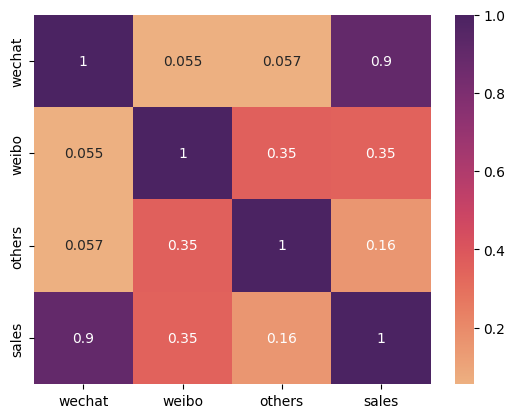

c:\Users\Administrator\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


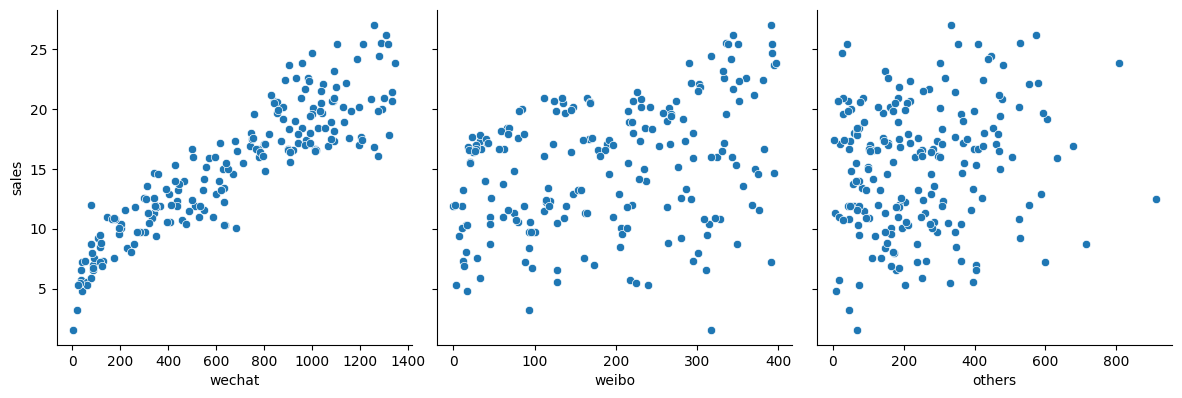

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns  # A data-visualization tool of Seaborn of Statistics

"draw heatmap(热力图) to all label and features"
sns.heatmap(DF_ads.corr(), cmap=sns.cm._flare_lut, annot=True)
plt.show()

"use scatter to dispaly relation of 2(ads method and sale)"
sns.pairplot(DF_ads,
             x_vars=['wechat', 'weibo', 'others'],
             y_vars='sales',
             height=4, aspect=1, kind='scatter')
plt.show()


## 3. Clean and format of dataset

In [3]:
"as we know the 'wecaht' are most corelate feature to the label from upon seies"
X = np.array(DF_ads.wechat)
y = np.array(DF_ads.sales)
print("rank of X: ", X.ndim)
print("shape of X: ", X.shape)
# print(X)

"format to 2D tensor, so that ml model can received"
X = X.reshape((len(X), 1))
y = y.reshape((len(y), 1))
print("rank of X: ", X.ndim)
print("shape of X: ", X.shape)


rank of X:  1
shape of X:  (200,)
rank of X:  2
shape of X:  (200, 1)


Now we have 2 dimension, 1 for sample(样本) (just meaning of 1 row), 1 for feature(特征) (the data or this row)

Then we need to do is:
  1. split dataset into train-set and test-set   

  2. unifrom(归一化) to dataset like below function
   
      $$x^{'}=\frac{x-min(x)}{max(X)-min(X)}$$

(160, 1) --- 2
(160, 1) --- 2


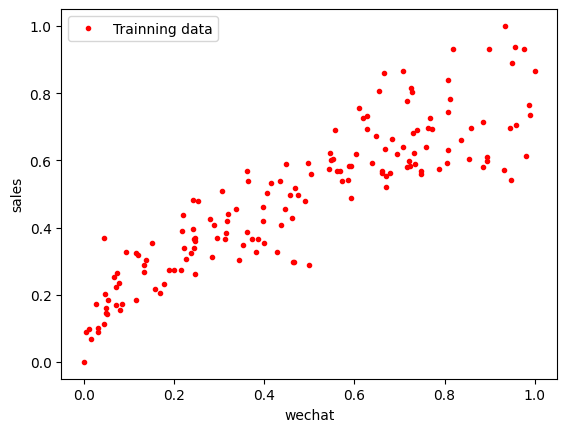

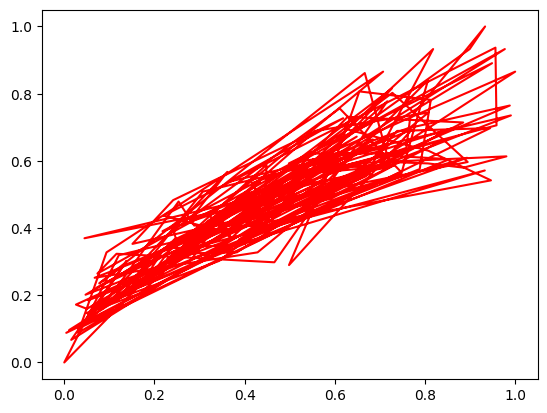

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

print(X_train.shape, '---', X_train.ndim)
print(y_train.shape, '---', y_train.ndim)


# def scaler(train :np.array, test: np.array): # data after split did not compatiable with array, maybe more than some dims
def scaler(train, test): 
    "Use ourselves' unifrom method instead of MaxScaler of sklearn.preprocessing"
    # max and min value of train-set
    min = train.min(axis=0)
    max = train.max(axis=0)
    # the diff (区间值)
    gap = max - min

    """
    All data substruct by min value, and then divide by diff of range(区间)
    So it turn into 0~1 maybe more or less by test data
    """
    train -= min
    train /= gap
    test -= min
    test /= gap

    "return datas that have been compressed"
    return train, test


# function also equivalent to this, just equvalation above
# x_norm = (x_data -np.min(x_data)) / np(max(x_data)-np.min(x_data)).values

# NOTICE: cannot use diff(gap) by the max-min from `testset`!!! so will use the train-set's diff
X_train, X_test = scaler(X_train, X_test)
y_train, y_test = scaler(y_train, y_test)


"Display datas that have beeb precessor, to see the difference on above notes"
plt.plot(X_train, y_train, 'r.', label="Trainning data")
plt.xlabel("wechat")
plt.ylabel('sales')
plt.legend()  # display 图例-legend
plt.show()
# notice the `r` and `r.`
plt.plot(X_train, y_train, 'r', label="Trainning data")
plt.show()


## 4. Choose model

- It's 2 array of dataset, feature and label. (2 Nx1 tensor).
- So it's simple to find the `linear regression` as the model. (from the 2nd view of data above)

### 4.1 predict what the function is -- h(x)

$$ y' = wx +b $$
also:
$$ h(x) = wx + b $$

### 4.2 loss and loss-function

To deduce which is better from 2 models between `3x+5` and `100x+1` somehow...

1. If model prefic absolutely precise, it will 0 (of cost/loss).
2. If did not match, will bring some loss value.

The `loss funtion` $L (w, b)$ which will use to caculate the average loss.

Will be call as `cost function` (代价/成本函数) somewhere, and noted it as $J(\theta)$, And the $\theta$ is just `w and b`， $$J(\theta) = L(w,b)$$

> NOTICE: loss function is about `w` and `b`, but not about `x` and `y`, we should turn our minds about it. Why:

- As in the trainning, the x and y are fixed.
- So w and b turn into variable in loss-func.

#### 4.2.1 Loss function that used in `Regression`

- Mean Square Error, MSE (均方误差), called squre-loss (平方损失) or L2-loss function also.
- Mean Abolute Error, MAE, called L1-loss also.

#### 4.2.2 Loss function that used in `Classification`

- Corss-entropy loos (交叉熵损失) function, so called 均方差， 最小二乘法
- Hinge loss (多分类SVM损失)  function


### 4.2.3 Detail

1. For every  sample: Its *predict* and *label*'s diff is $(y-y')$, and $y'=wx+b$, so `loss value` is related with w and b.

2. If we promte the $(y-y')$, squre of it....(all are positve, non-negative), so called `square loss` of every sample:   $(y-y')^2$

3. Then, we need sumup are `square-loss` of all sample:
$$
    ( y（x(1)-y'(x(1) )^2 + 
    ( y（x(2)-y'(x(2) )^2 + 
    ... +
    ( y（x(n)-y'(x(n) )^2  
$$
And as sumup format is:


$$
\sum\limits_{(x,y)\in{D}} (y-h(x))^2
$$


In [17]:
def MSE_loss(X, y, weight, bias):
    """Ourselves' MSE loss function"""
    y_hat = weight * X + bias
    loss = y_hat - y  # every diff from prefit and label
    squre_loss_sum = np.sum(loss**2)
    # print(squre_loss_sum)
    # print(2*len(X))
    # cost = squre_loss_sum / 2*len(X)  # not equal when a/b * c and a/ (b*c): 5/5 *2 = 2, 5/(5*2) =1/2
    cost = squre_loss_sum / (2*len(X))  # average for divide  2n
    return cost


weight = 5
bias = 3
print(
    f"When `weight`=={weight}, `bais`=={bias}, the loss={ MSE_loss(X_train, y_train, weight, bias)}")
weight = 100
bias = 1
print(
    f"When `weight`=={weight}, `bais`=={bias}, the loss={ MSE_loss(X_train, y_train, weight, bias)}")


When `weight`==5, `bais`==3, the loss=12.796390970780058
When `weight`==100, `bais`==1, the loss=1577.9592615030556


## 5. Use `gradient descent` (梯度下降法)  to find best parameters

We have noticed that (5,3) is better than (100,1) of (w, b). 

But how to let bare machine to know which is best?
1. Every guess (parameters) should be better than previous one.
2. So the convex function(凸函数) and global lower point (全局最节点) were here.

The original *Mean Squre Error* function:
$$
MSE = L(w,b) = \frac{1}{2N} \sum\limits_{(x,y)\in{d}} (y-(wx+b))^2
$$

The `x` and `y` could be considered as constant fixed value... So `L` will only changed by the `w` and `b`.

And the function is a `quadratic function` (二次函数), we could just think it was a parabola with upward opening (开口向上的抛物线)


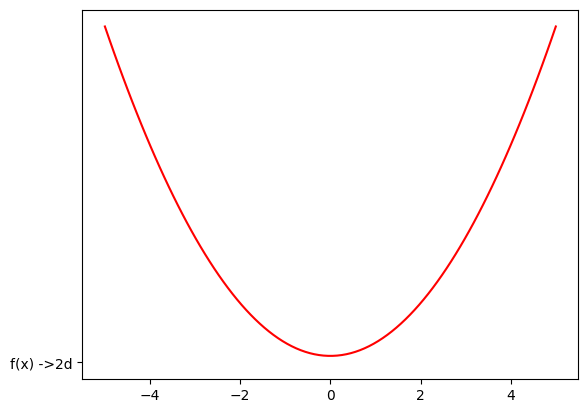

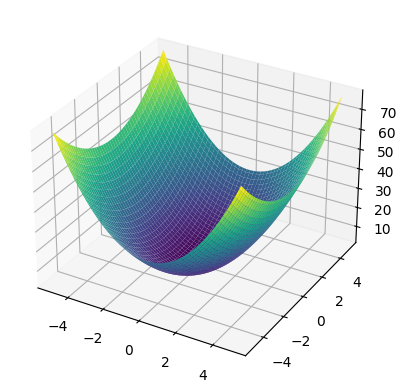

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def fx(x): return 2*x**2 + 1


x = np.linspace(-5, 5, 100)
Y = fx(x)
plt.plot(x, Y, 'r', "f(x) ->2d")
plt.show()


def hx(x, y): return 2*x**2 + y**2 + 3


y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = hx(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


### 5.1 The implementation of gradient descent

Just change the `w` and `b` to let the `L` (loss) more and more close to the lowest point.

Just a  dynmaic plan: go the lower loss point every step.

> Caculate the derivative (导数) !

The `gradient` means the vector of loss (current and previous), will `equal to` the `derivative` ?

- `Gradient ==  derivative` when there is only one `weight` in equation
- More than one weight the gradient will be `partial derivative` (偏导数)

So we get the gradient by derivation with loss curve/functon. And the `gradient` have serval properties:

1. Direction (the positive/negative of gradient)
2. Len/Size/Norm (the magnitude of the tangential tilt (切线倾斜的幅度) )


> So how to calculate the gradient in math:

~~Notice that will be `x times` but not `square-loss` in partial derviation~~

It's the derviation of `function of funtion` (复合函数)

$$
\begin{align}

Gradietn &= \frac{\partial}{\partial W} L(W) \\
         &= \frac{\partial}{\partial W}  \frac{1}{2N} \sum \limits_{(x,y)\in D}  
            (y- h(x)^2)  \\
         &= \frac{\partial}{\partial W}  \frac{1}{2N} \sum \limits_{(x,y)\in D} 
            (y- (w*x)) * X 

\end {align}
$$

Could also be write as:
$$

Gradietn = \frac{\partial}{\partial W}  \frac{1}{2N} \sum \limits_{i=1}^{N} 
            (y^{(i)}- (w*x^{(i)})) * X^{(i)}
$$

   ```python
   "A simple implementaion of gradient evaluator"
   y_hat = weight * X + bias  # assumed function model
   loss = y_hat - y  # get the loss, [a,b,c....]

   "X.T is (1,N) and dot (N,) will just be the dy/dx"
   # derivation of weight, len(X) are count of sample
   derivative_weight = X.T.dot(loss) / len(X)

   # derivation of bias, len(X) are count of sample
   derivative_bias = sum(loss) * 1 / len(X)
   ```
